<a href="https://colab.research.google.com/github/ALANWALKERMK7/trading_analysis/blob/main/Algorithimic_trading_strategy_using_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
#import libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [44]:
#load the data
from google.colab import files
uploaded = files.upload()

Saving aapl.csv to aapl (1).csv


In [45]:
#store the data
AAPL = pd.read_csv('aapl (1).csv')
#show the data
AAPL

,Date,Open,High,Low,Close,Volume,Adj Close
0,2008-10-14,116.26,116.40,103.14,104.08,70749800,104.08
1,2008-10-13,104.55,110.53,101.02,110.26,54967000,110.26
2,2008-10-10,85.70,100.00,85.00,96.80,79260700,96.80
3,2008-10-09,93.35,95.80,86.60,88.74,57763700,88.74
4,2008-10-08,85.91,96.33,85.68,89.79,78847900,89.79
...,...,...,...,...,...,...,...
6076,1984-09-13,27.50,27.62,27.50,27.50,7429600,3.14
6077,1984-09-12,26.87,27.00,26.12,26.12,4773600,2.98
6078,1984-09-11,26.62,27.37,26.62,26.87,5444000,3.07
6079,1984-09-10,26.50,26.62,25.87,26.37,2346400,3.01


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


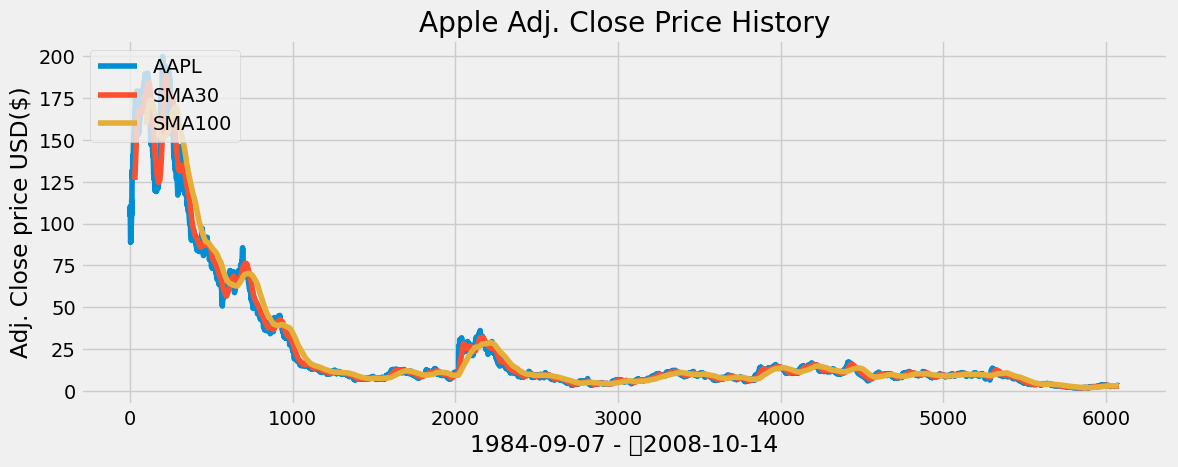

In [54]:
#visualize the data
plt.figure(figsize = (12.5,4.5))
plt.plot(AAPL['Adj Close'], label = 'AAPL')
plt.plot(SMA30['Adj Close'], label = 'SMA30')
plt.plot(SMA100['Adj Close'], label = 'SMA100')
plt.title('Apple Adj. Close Price History')
plt.xlabel('1984-09-07 - 	2008-10-14')
plt.ylabel('Adj. Close price USD($)')
plt.legend(loc = 'upper left')
plt.show()

In [56]:
#create a simple moving average with a 30day window
SMA30 = pd.DataFrame()
SMA30['Adj Close'] = AAPL['Adj Close'].rolling(window=30).mean()
SMA30


,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
6076,2.921667
6077,2.921000
6078,2.924333
6079,2.928333


In [57]:
#Create a simple moving 100 day average
SMA100 = pd.DataFrame()
SMA100['Adj Close'] = AAPL['Adj Close'].rolling(window=100).mean()
SMA100

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
6076,3.0145
6077,3.0109
6078,3.0089
6079,3.0059


In [58]:
#create a new dataframe to store all the data
data = pd.DataFrame()
data['AAPL'] = AAPL['Adj Close']
data['SMA30'] = SMA30['Adj Close']
data['SMA100'] = SMA100['Adj Close']
data

,AAPL,SMA30,SMA100
0,104.08,NaN,NaN
1,110.26,NaN,NaN
2,96.80,NaN,NaN
3,88.74,NaN,NaN
4,89.79,NaN,NaN
...,...,...,...
6076,3.14,2.921667,3.0145
6077,2.98,2.921000,3.0109
6078,3.07,2.924333,3.0089
6079,3.01,2.928333,3.0059


In [59]:
#create a function to signal when to buy and sell the asset/stock
def buy_sell(data):
  sigPriceBuy = []
  sigPricesell = []
  flag = -1

  for i in range(len(data)):
    if data['SMA30'][i] > data['SMA100'][i]:
      if flag != 1:
        sigPriceBuy.append(data['AAPL'][i])
        sigPricesell.append(np.nan)
        flag = 1
      else:
        sigPriceBuy.append(np.nan)
        sigPricesell.append(np.nan)
    elif data['SMA30'][i] < data['SMA100'][i]:
      if flag != 0:
        sigPriceBuy.append(np.nan)
        sigPricesell.append(data['AAPL'][i])
        flag = 0
      else:
        sigPriceBuy.append(np.nan)
        sigPricesell.append(np.nan)
    else:
      sigPriceBuy.append(np.nan)
      sigPricesell.append(np.nan)
  return (sigPriceBuy, sigPricesell)


In [60]:
#store the buy and sell data into a variable
buy_sell = buy_sell(data)
data['Buy_Signal_Price'] = buy_sell[0]
data['Sell_Signal_Price'] = buy_sell[1]

In [61]:
#Show the data
data

,AAPL,SMA30,SMA100,Buy_Signal_Price,Sell_Signal_Price
0,104.08,NaN,NaN,NaN,NaN
1,110.26,NaN,NaN,NaN,NaN
2,96.80,NaN,NaN,NaN,NaN
3,88.74,NaN,NaN,NaN,NaN
4,89.79,NaN,NaN,NaN,NaN
...,...,...,...,...,...
6076,3.14,2.921667,3.0145,NaN,NaN
6077,2.98,2.921000,3.0109,NaN,NaN
6078,3.07,2.924333,3.0089,NaN,NaN
6079,3.01,2.928333,3.0059,NaN,NaN


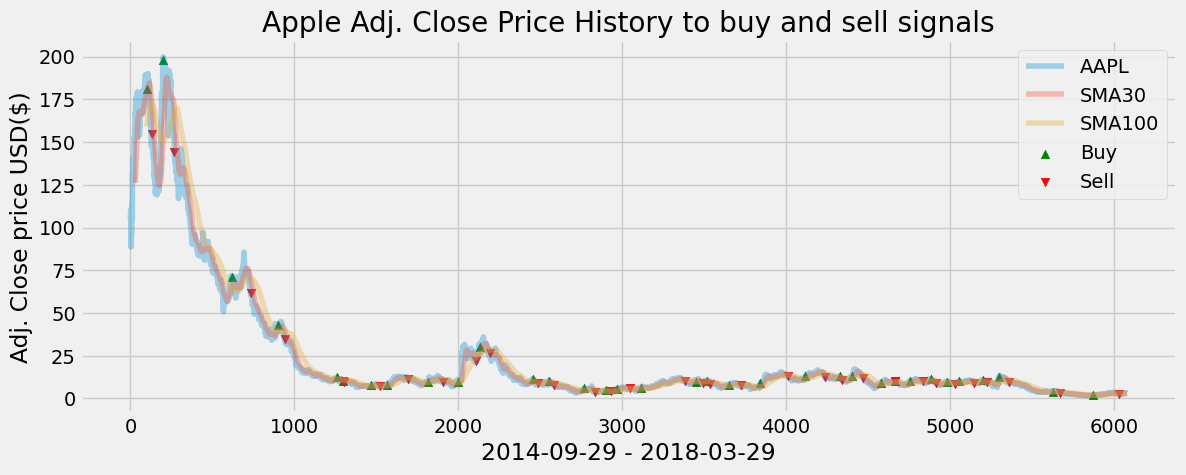

In [63]:
#visualize the data and strategy to buy and sell
plt.figure(figsize=(12.6,4.6))
plt.plot(data['AAPL'], label = 'AAPL', alpha = 0.35)
plt.plot(data['SMA30'], label = 'SMA30', alpha = 0.35)
plt.plot(data['SMA100'], label = 'SMA100', alpha = 0.35)
plt.scatter(data.index, data['Buy_Signal_Price'], label = 'Buy', marker = '^', color = 'green')
plt.scatter(data.index, data['Sell_Signal_Price'], label = 'Sell', marker = 'v', color = 'red')
plt.title('Apple Adj. Close Price History to buy and sell signals')
plt.xlabel('2014-09-29 - 2018-03-29')
plt.ylabel('Adj. Close price USD($)')
plt.legend(loc ='upper right')
plt.show()